# LINE:Large-scale Information Network Embedding

In [ ]:
!pip install Vose-Alias-Method

In [ ]:
# Import library
import networkx as nx
import numpy as np
from vose_sampler import VoseAlias
import matplotlib.pyplot as plt
import collections
from tqdm import tqdm
from tqdm import trange

In [ ]:
# Load the karate club network
G = nx.karate_club_graph()

# Define the first-order proximity matrix
P = nx.to_numpy_array(G)

# Normalize the proximity matrix
P_normalized = P / P.sum(axis=1)[:, np.newaxis]

print(P_normalized)

[[0.         0.0952381  0.11904762 ... 0.04761905 0.         0.        ]
 [0.13793103 0.         0.20689655 ... 0.         0.         0.        ]
 [0.15151515 0.18181818 0.         ... 0.         0.06060606 0.        ]
 ...
 [0.0952381  0.         0.         ... 0.         0.19047619 0.19047619]
 [0.         0.         0.05263158 ... 0.10526316 0.         0.13157895]
 [0.         0.         0.         ... 0.08333333 0.10416667 0.        ]]


In [ ]:
P

array([[0., 4., 5., ..., 2., 0., 0.],
       [4., 0., 6., ..., 0., 0., 0.],
       [5., 6., 0., ..., 0., 2., 0.],
       ...,
       [2., 0., 0., ..., 0., 4., 4.],
       [0., 0., 2., ..., 4., 0., 5.],
       [0., 0., 0., ..., 4., 5., 0.]])

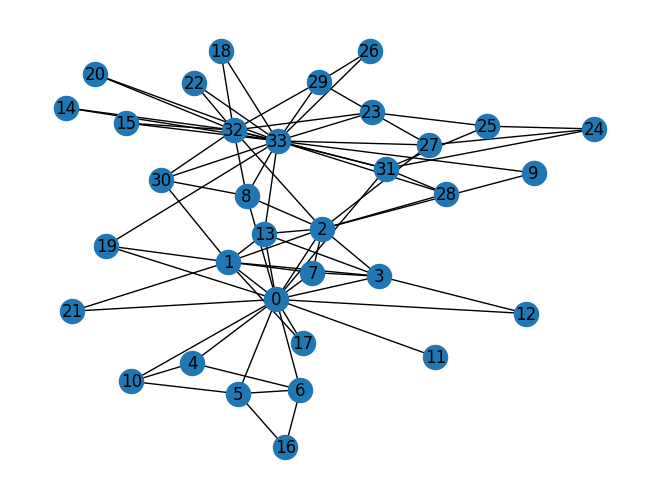

In [ ]:
nx.draw(G, with_labels = True)

## Edge Sampling

Sampling an edge from the alias table

In [ ]:
def create_alias_table(area_ratio):
    l = len(area_ratio)
    accept, alias = [0] * l, [0] * l
    small, large = [], []
    area_ratio_ = np.array(area_ratio) * l
    for i, prob in enumerate(area_ratio_):
        if prob < 1.0:
            small.append(i)
        else:
            large.append(i)

    while small and large:
        small_idx, large_idx = small.pop(), large.pop()
        accept[small_idx] = area_ratio_[small_idx]
        alias[small_idx] = large_idx
        area_ratio_[large_idx] = area_ratio_[large_idx] - \
                                 (1 - area_ratio_[small_idx])
        if area_ratio_[large_idx] < 1.0:
            small.append(large_idx)
        else:
            large.append(large_idx)

    while large:
        large_idx = large.pop()
        accept[large_idx] = 1
    while small:
        small_idx = small.pop()
        accept[small_idx] = 1

    return accept, alias


def alias_sample(accept, alias):
    N = len(accept)
    i = int(np.random.random() * N)
    r = np.random.random()
    if r < accept[i]:
        return i
    else:
        return alias[i]

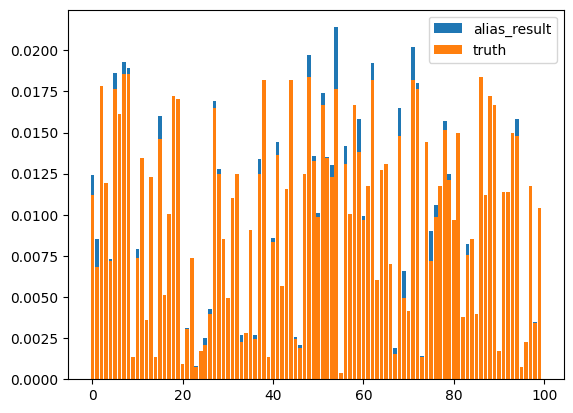

In [ ]:
def gen_prob_dist(N):
    p = np.random.randint(0, 100, N)
    return p/np.sum(p)


def simulate(N=100, k=10000,):

    truth = gen_prob_dist(N)

    area_ratio = truth
    accept, alias = create_alias_table(area_ratio)

    ans = np.zeros(N)
    for _ in range(k):
        i = alias_sample(accept, alias)
        ans[i] += 1
    return ans/np.sum(ans), truth



alias_result, truth = simulate()
plt.bar(list(range(len(alias_result))), alias_result, label='alias_result')
plt.bar(list(range(len(truth))), truth, label='truth')
plt.legend()

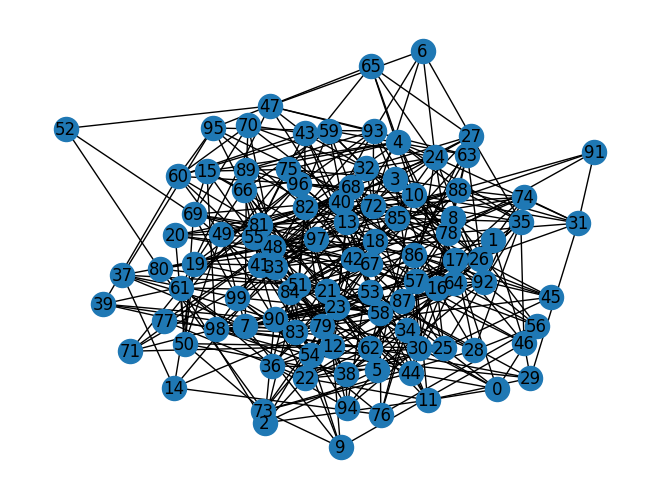

In [ ]:
# Create an Erdős-Rényi graph with 100 nodes and probability 0.1
G_erdos = nx.erdos_renyi_graph(100, 0.1)

# Plot the graph with labels
nx.draw(G_erdos, with_labels=True)
plt.show()

In [ ]:
# Create an Erdős-Rényi graph with 100 nodes and probability 0.1
G_erdos = nx.erdos_renyi_graph(100, 0.1)

# Get the edge list of the graph
edge_list = G_erdos.edges

# Create a dictionary to store the edge list with weights and total weightsum
edgedistdict = collections.defaultdict(int)
weightsum = 0

# For each edge in the edge list, assign a random weight between 1 and 100.
for edge in edge_list:
    weight = np.random.uniform(1, 100)
    edgedistdict[(edge[0], edge[1])] = weight
    weightsum += weight

for edge, weight in edgedistdict.items():
    edgedistdict[edge] = weight / weightsum

# Print the normalized edge list with weights
print(edgedistdict)


defaultdict(<class 'int'>, {(0, 12): 0.0022917282387984626, (0, 25): 0.0016583751585222692, (0, 60): 0.0032691316010132828, (0, 63): 0.0008202415730593451, (0, 66): 0.0019339284437972124, (0, 68): 0.002972448730535009, (0, 74): 0.0005444980373527999, (0, 81): 0.0025467464661388093, (0, 88): 0.001837502616806027, (0, 89): 0.0016175420569726174, (0, 90): 0.000703206189053869, (0, 93): 0.0019299441714826656, (0, 94): 0.001515075157970572, (0, 95): 0.0009098053804756977, (0, 96): 0.0006518069854865371, (1, 8): 0.0012805389417532113, (1, 14): 0.0024380120087576155, (1, 22): 0.0018486160442029436, (1, 28): 0.001950939156890659, (1, 42): 0.001673715239963003, (1, 43): 0.0002957728121818739, (1, 62): 0.002850774301022737, (1, 84): 0.0018891077479484424, (1, 94): 0.0013948400990403534, (2, 3): 0.0013875518332861422, (2, 12): 0.003073203370038013, (2, 22): 0.002210026152069112, (2, 27): 0.002062706872481439, (2, 32): 0.0026793614957711927, (2, 43): 0.0037840970352409236, (2, 47): 0.0035050049942

In [ ]:
# Edge sampling using alias table
edgesaliassampler = VoseAlias(edgedistdict)
batchrange = int(len(edgedistdict) / 5)

for b in trange(batchrange):
  print(edgesaliassampler.sample_n(size=5))

100%|██████████| 100/100 [00:00<00:00, 3194.08it/s]

[(5, 15), (94, 99), (5, 62), (2, 43), (31, 33)]
[(3, 8), (37, 93), (21, 63), (67, 94), (42, 79)]
[(22, 31), (50, 57), (12, 71), (44, 66), (27, 70)]
[(45, 71), (50, 55), (10, 74), (2, 22), (15, 71)]
[(4, 26), (21, 53), (22, 23), (5, 41), (11, 24)]
[(29, 64), (17, 51), (31, 69), (12, 22), (35, 63)]
[(17, 18), (59, 75), (15, 95), (43, 76), (0, 66)]
[(3, 22), (45, 71), (75, 93), (7, 75), (21, 98)]
[(11, 80), (1, 62), (31, 61), (0, 68), (12, 19)]
[(90, 95), (0, 60), (17, 18), (12, 20), (52, 99)]
[(38, 46), (27, 88), (22, 73), (24, 54), (0, 93)]
[(52, 74), (52, 99), (13, 70), (11, 47), (20, 45)]
[(15, 71), (12, 22), (0, 66), (5, 11), (64, 89)]
[(10, 74), (7, 97), (69, 74), (58, 90), (48, 89)]
[(38, 44), (4, 39), (50, 57), (7, 75), (14, 97)]
[(7, 15), (13, 18), (25, 50), (25, 54), (38, 44)]
[(0, 81), (90, 95), (15, 64), (32, 55), (21, 98)]
[(11, 18), (2, 47), (22, 83), (13, 26), (9, 78)]
[(22, 73), (62, 63), (38, 44), (35, 81), (6, 27)]
[(47, 75), (21, 53), (7, 15), (51, 92), (13, 84)]
[(11, 

# Singular Value Decomposition in Matrix Adjacency

In [2]:
import networkx as nx
import numpy as np
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix

# Load the karate club network
G = nx.karate_club_graph()

# Define the Katz index similarity
def katz_index(G, alpha=0.5, max_iter=100, tol=1e-3):
    n = len(G.nodes())
    A = nx.adjacency_matrix(G).todense()
    I = np.eye(n)
    X = I
    converged = False
    for i in range(max_iter):
        X_prev = X
        X = alpha * A.dot(X) + (1 - alpha) * I
        if np.linalg.norm(X - X_prev) < tol:
            converged = True
            break
    return X

# Compute the Katz index similarity matrix
X = katz_index(G)

# Perform singular value decomposition on the adjacency matrix
U, s, Vh = svds(X, k=2)

# Print the singular values
print(s)

# Print the left singular vectors
print(U)

# Print the right singular vectors
print(Vh)


[4.41519941e+091 3.46416835e+103]
[[ 0.33091526 -0.31235123]
 [ 0.33411882 -0.30175117]
 [ 0.2745959  -0.36058862]
 [ 0.24818026 -0.19856719]
 [ 0.08309445 -0.05567475]
 [ 0.10827005 -0.06742808]
 [ 0.10598271 -0.06644822]
 [ 0.22454863 -0.17843234]
 [-0.03320635 -0.24695058]
 [-0.02345561 -0.05020307]
 [ 0.0722491  -0.04583322]
 [ 0.05803239 -0.04320695]
 [ 0.06286811 -0.04186974]
 [ 0.18811472 -0.24048654]
 [-0.09785049 -0.07953765]
 [-0.13735465 -0.1131142 ]
 [ 0.037575   -0.01851886]
 [ 0.05822035 -0.04271819]
 [-0.05895484 -0.04889692]
 [ 0.05799843 -0.07342003]
 [-0.07809666 -0.06274937]
 [ 0.07775139 -0.05663175]
 [-0.09815584 -0.08100556]
 [-0.2897049  -0.21804371]
 [-0.06604126 -0.05104891]
 [-0.17460684 -0.12258229]
 [-0.08337347 -0.05862926]
 [-0.12623281 -0.14768307]
 [-0.03089236 -0.08614539]
 [-0.18759846 -0.13583302]
 [-0.08436198 -0.15831325]
 [-0.20089906 -0.20945644]
 [-0.33267133 -0.33226141]
 [-0.33790819 -0.36409688]]
[[-0.11426771  0.30209429 -0.07856866 -0.037049